In [80]:
#ProgramName: 
#Purpose: 
#Author:  Greg Turmel, Director, Data Governance 
#Date:    2020.08.30 - 2021.06.30
#Errata:  0.1 Improvements can be made to script using for/looping through the databases

import os
import sqlalchemy as db
import pandas as pd
import numpy as np

In [97]:
import matplotlib as plt
# import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import pyodbc 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (30,5)
%config InlineBackend.figure_format = 'retina'


In [82]:
from dotenv import load_dotenv # add this line
load_dotenv() # add this line
user = os.getenv('MySQLeUser')
password = os.getenv('MySQLeUserPass')
host = os.getenv('MySQLeHOST')
db = os.getenv('MySQLeDB')
%matplotlib inline
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [83]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=PRODODSSQL;'
                      'Database=ApplicationData;'
                      'Trusted_Connection=yes;')

In [84]:
sql_query = pd.read_sql_query(''' 
select CONVERT(char(8), GetDate(),112) as TodaysDate, s.name as SchemaName, OBJECT_NAME(o.OBJECT_ID) AS TableName, p.row_count as RecordCount
FROM
SYS.objects o JOIN SYS.schemas s
   ON o.schema_id=s.schema_id
        JOIN sys.dm_db_partition_stats p
   ON o.object_id=p.object_id
WHERE o.type LIKE 'U'
ORDER BY TableName

                              '''
                              ,conn) # here, the 'conn' is the variable that contains your database connection information from above

In [85]:
df = pd.DataFrame(sql_query)

In [86]:
df.head()

TodaysDate       SchemaName                     TableName  RecordCount
0   20201102              dbo              AcademicContract        21194
1   20201102              dbo  AcademicContractIntervention       270431
2   20201102          LogView                  AccessRights           24
3   20201102  TCAccommodation         AccommodationToColMap          104
4   20201102   StudentProfile                  Addendum_Log       194254

In [87]:
sql_query.head()

TodaysDate       SchemaName                     TableName  RecordCount
0   20201102              dbo              AcademicContract        21194
1   20201102              dbo  AcademicContractIntervention       270431
2   20201102          LogView                  AccessRights           24
3   20201102  TCAccommodation         AccommodationToColMap          104
4   20201102   StudentProfile                  Addendum_Log       194254

In [88]:
import time
dt1 = time.strftime("%d/%m/%Y")
dt2 = time.strftime("%d.%m.%Y")
dt3 = pd.to_datetime('today')
dt4 = pd.Timestamp('today').strftime("%Y%m%d")

In [89]:
print (dt1)
print (dt2)
print (dt3)
print (dt4)

02/11/2020
02.11.2020
2020-11-02 11:15:52.705584
20201102


Each dataframe is unique with each database table records

In [90]:
dfAppData = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountApplicationData.csv',encoding='cp1252')
dfAssessment = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountAssessment.csv',encoding='cp1252')
dfControl = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountControl.csv',encoding='cp1252')
dfDownstreamFeeds = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountDownstreamFeeds.csv',encoding='cp1252')
dfDownstreamFeedsV15 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountDownstreamFeedsV15.csv',encoding='cp1252')
dfGCPS_Operations = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountGCPS_Operations.csv',encoding='cp1252')
dfGSDR = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountGSDR.csv',encoding='cp1252')
dfGSDR_Synergy = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountGSDR_Synergy.csv',encoding='cp1252')
dfGSDR_Synergy_Temp = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountGSDR_Synergy_Temp.csv',encoding='cp1252')
dfGSDR_Temp = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountGSDR_Temp.csv',encoding='cp1252')
dfODS_WebApps = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountODS_WebApps.csv',encoding='cp1252')
dfPPROD = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountPPROD.csv',encoding='cp1252')
dfPredictive_Analytics = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tableRowCountPredictive_Analytics.csv',encoding='cp1252')

Remove (zero) data sets from data frame for displaying only tables with data

In [104]:
dfAppData2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountAppDataWdata.csv',encoding='cp1252')
dfAssessment2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountAssmntWdata.csv',encoding='cp1252')
dfControl2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountCtrlWdata.csv',encoding='cp1252')
dfDownstreamFeeds2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountDwnStrmFeedWdata.csv',encoding='cp1252')
dfDownstreamFeedsV152 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountDwnStrmFeedV15Wdata.csv',encoding='cp1252')
dfGCPS_Operations2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountGCPSOpsWdata.csv',encoding='cp1252')
dfGSDR2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountGSDRWdata.csv',encoding='cp1252')
dfGSDR_Synergy2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountGSDRSyngyWdata.csv',encoding='cp1252')
dfGSDR_Synergy_Temp2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountGSDRSyngyTmpWdata.csv',encoding='cp1252')
dfGSDR_Temp2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountGSDRTmpWdata.csv',encoding='cp1252')
dfODS_WebApps2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountODSWebAppsWdata.csv',encoding='cp1252')
dfPPROD2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountPPdWdata.csv',encoding='cp1252')
dfPredictive_Analytics2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\001 TableColumnRowCounts (001)\tblRowCountPrdtAnalyWdata.csv',encoding='cp1252')

In [91]:
df_concat = pd.concat([dfAppData,dfAssessment,dfControl,dfDownstreamFeeds,dfDownstreamFeedsV15,dfGCPS_Operations,dfGSDR,dfGSDR_Synergy,dfGSDR_Synergy_Temp,dfGSDR_Temp,dfODS_WebApps,dfPPROD,dfPredictive_Analytics])

In [101]:
df_concat2 = pd.concat([dfAppData2,dfAssessment2,dfControl2,dfDownstreamFeeds2,dfDownstreamFeedsV152,dfGCPS_Operations2,dfGSDR2,dfGSDR_Synergy2,dfGSDR_Synergy_Temp2,dfGSDR_Temp2,dfODS_WebApps2,dfPPROD2,dfPredictive_Analytics2])

In [92]:
df_final = df_concat
df_final.set_index('TodaysDate', inplace=True)

In [93]:
df_final.head(n = 5)

SchemaName                     TableName  RecordCount
TodaysDate                                                            
20201021                dbo              AcademicContract        21194
20201021                dbo  AcademicContractIntervention       270431
20201021            LogView                  AccessRights           24
20201021    TCAccommodation         AccommodationToColMap          103
20201021     StudentProfile                  Addendum_Log       194254

In [94]:
df_concat.tail(n =5)

SchemaName                TableName  RecordCount
TodaysDate                                                           
20201102                    SGM  Teacher_Section_Windows       339894
20201102                    ABC         TeacherClassList       130799
20201102    ABC_2020PreRollOver         TeacherClassList       134658
20201102                    SGM                    Terms         1148
20201102                    SGM                    Terms         1148

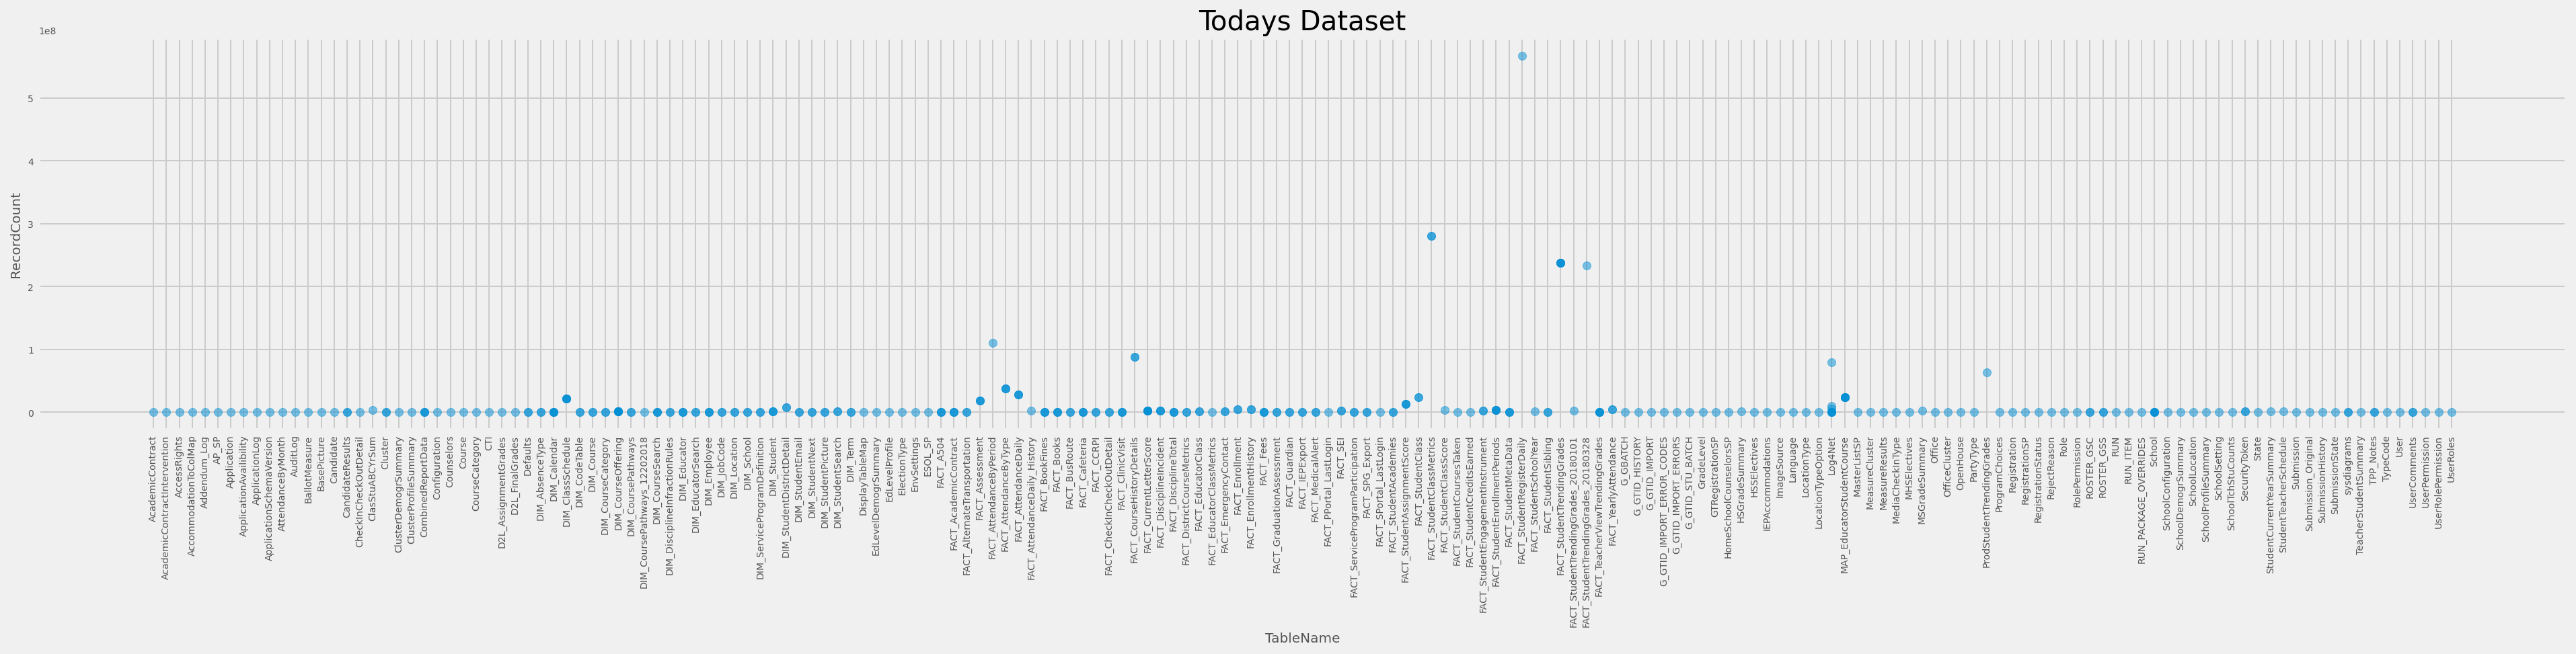

In [98]:
#df ----- pd.DataFrame(sql_query) from todays dataset
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Todays Dataset')
y = df['RecordCount']
x = df['TableName']
plt.scatter(x, y, alpha = 0.5)
plt.xticks(rotation=90)
import matplotlib 
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
plt.rcParams['figure.figsize'] = [30, 5]
plt.show()

Remove tables from display that are (zero data) and render in second diagram (for each)

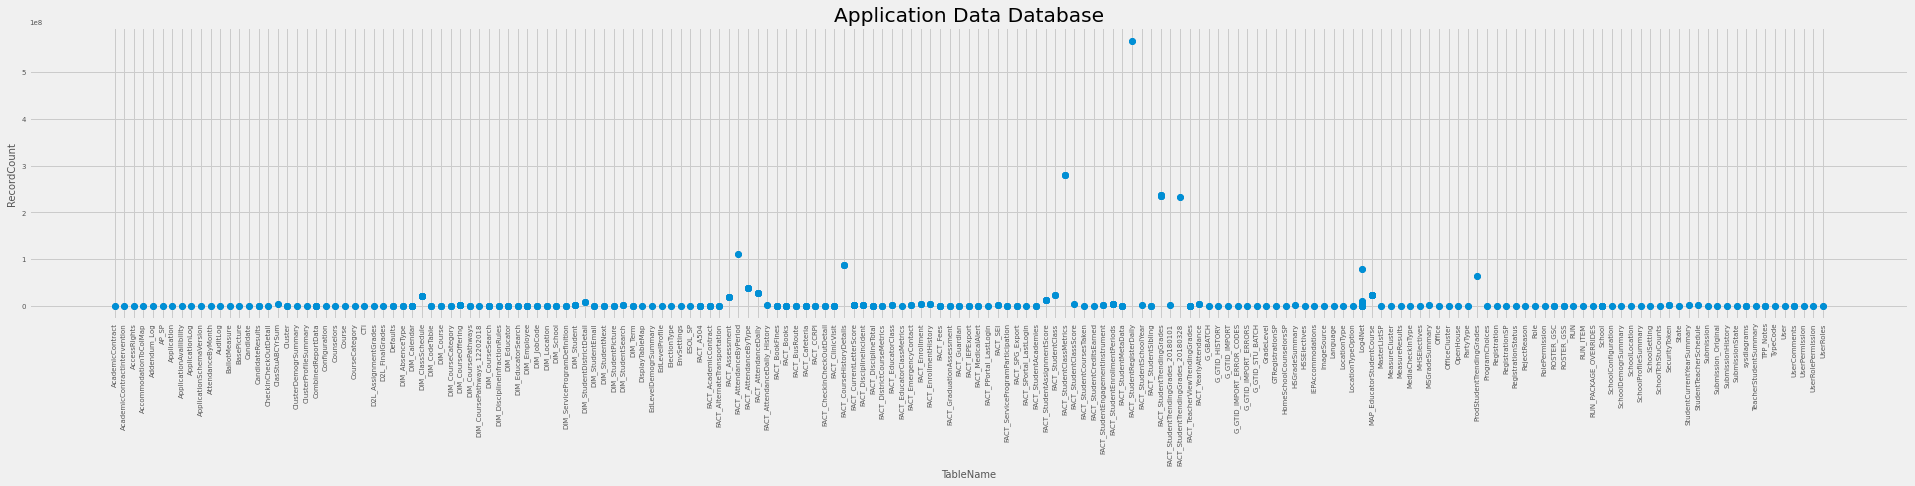

In [76]:
#dfAppData
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Application Data Database')
y = dfAppData['RecordCount']
x = dfAppData['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

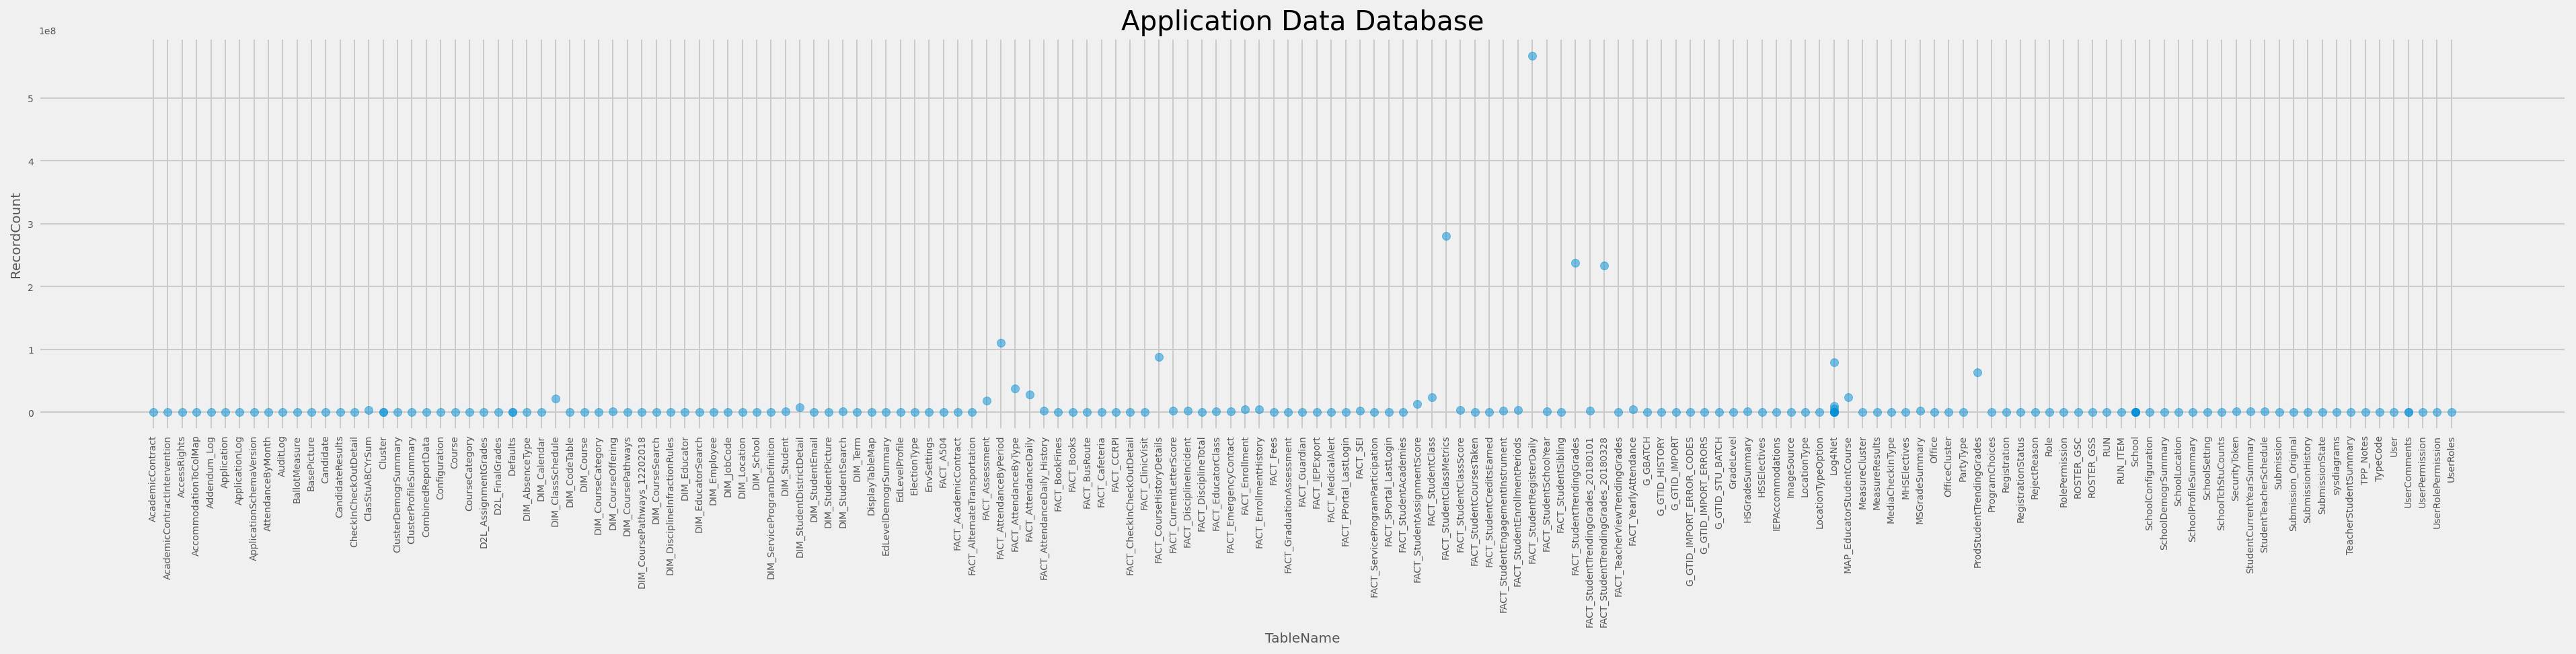

In [105]:
#dfAppData2
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Application Data Database')
y = dfAppData2['RecordCount']
x = dfAppData2['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

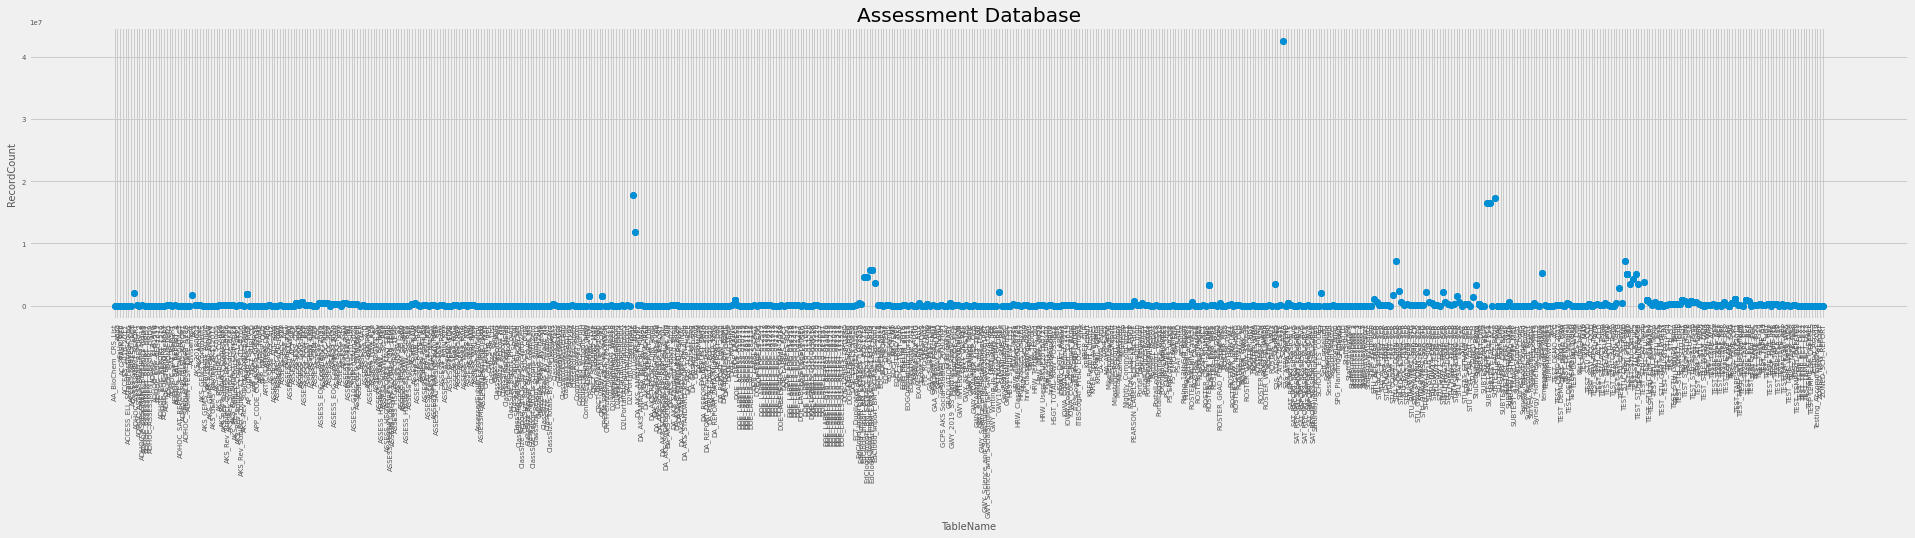

In [75]:
#dfAssessment
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Assessment Database')
y = dfAssessment['RecordCount']
x = dfAssessment['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

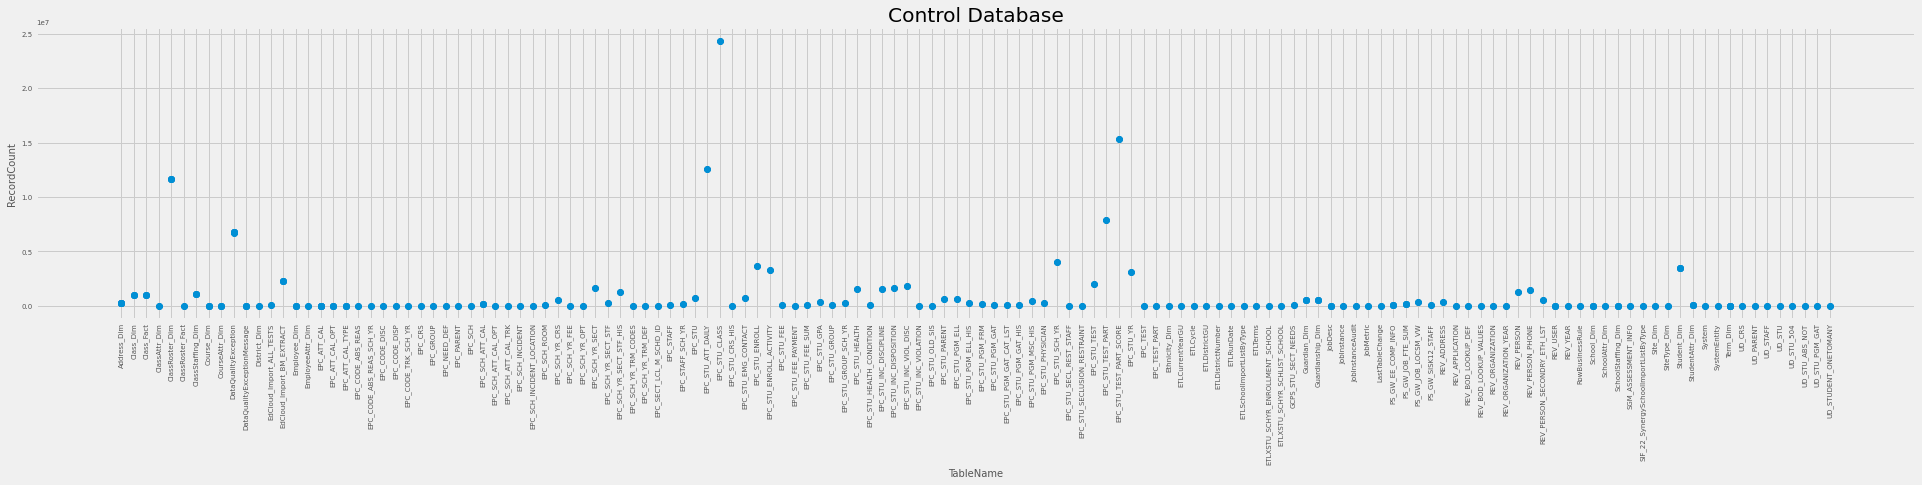

In [74]:
#dfControl
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Control Database')
y = dfControl['RecordCount']
x = dfControl['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

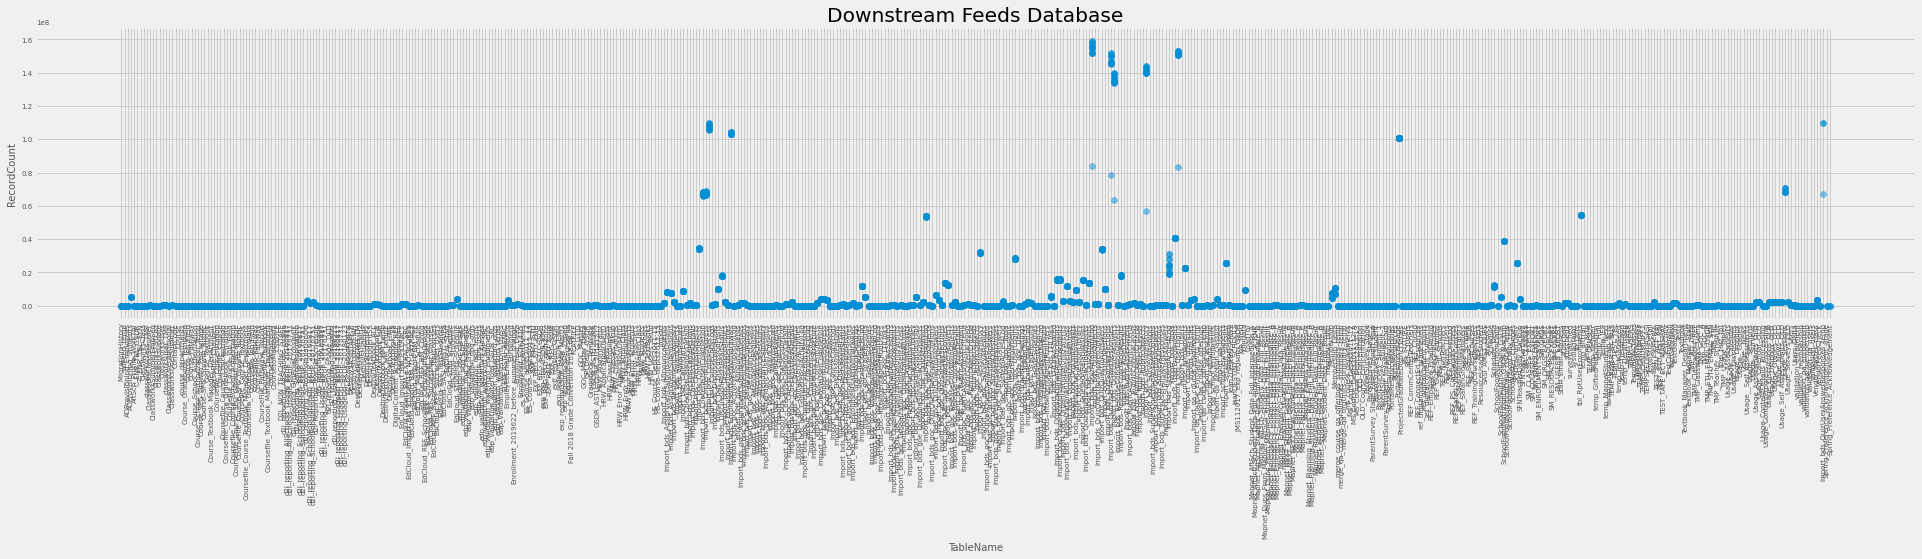

In [73]:
#dfDownstreamFeeds
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Downstream Feeds Database')
y = dfDownstreamFeeds['RecordCount']
x = dfDownstreamFeeds['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

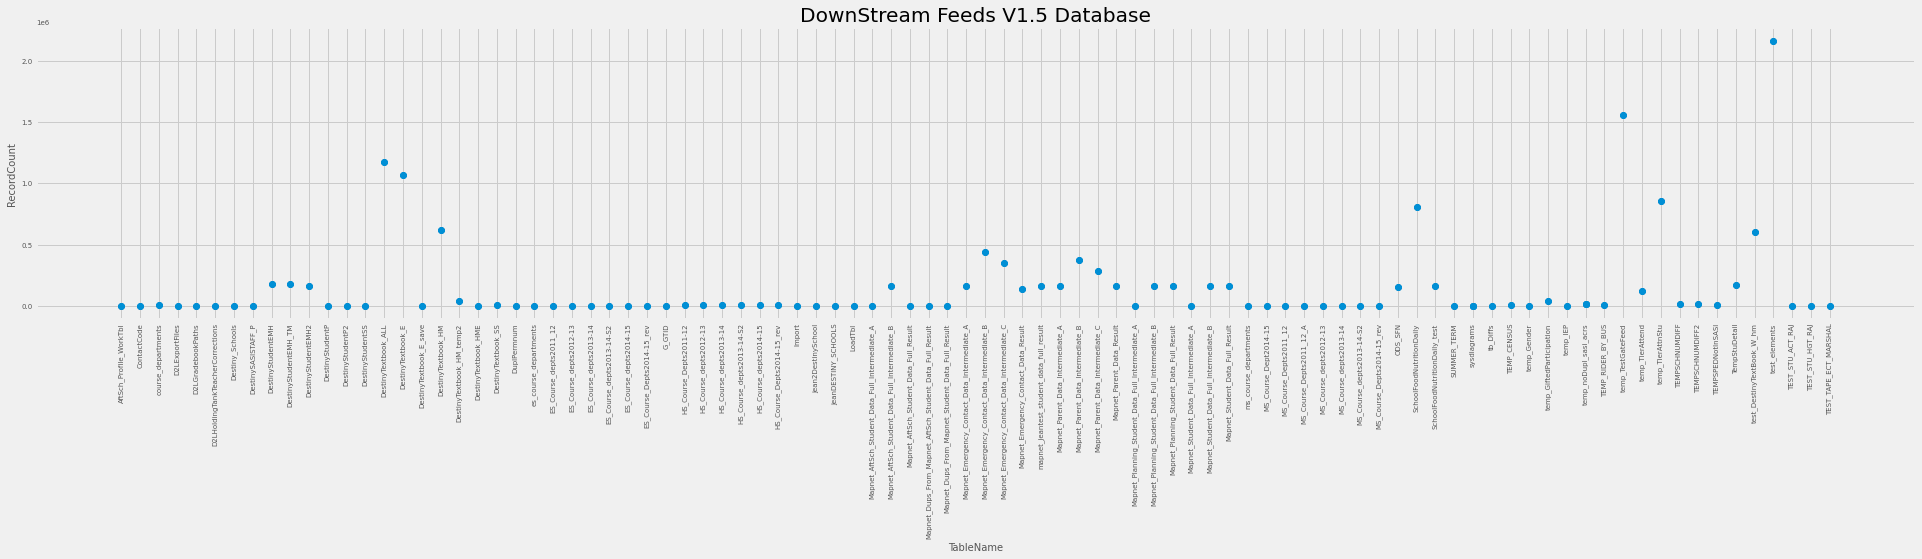

In [72]:
#dfDownstreamFeedsV15
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('DownStream Feeds V1.5 Database')
y = dfDownstreamFeedsV15['RecordCount']
x = dfDownstreamFeedsV15['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

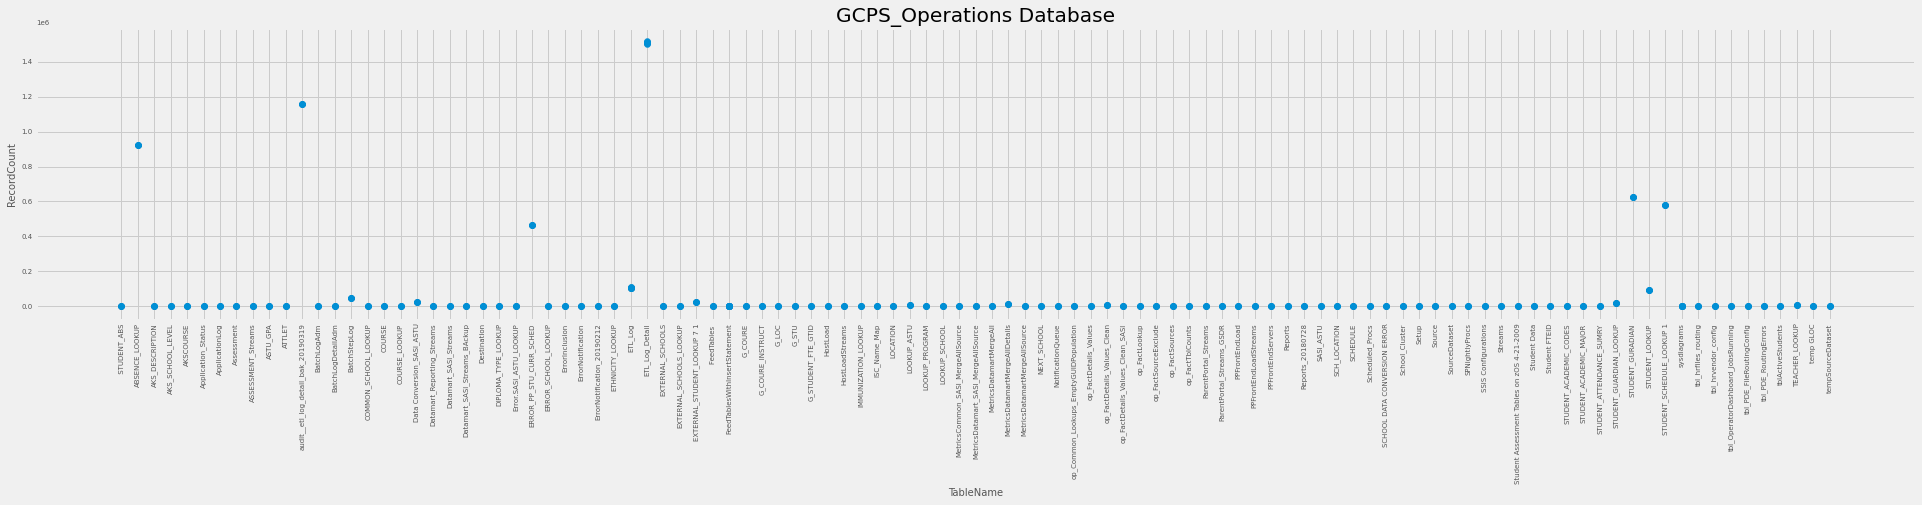

In [71]:
#dfGCPS_Operations
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('GCPS_Operations Database')
y = dfGCPS_Operations['RecordCount']
x = dfGCPS_Operations['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

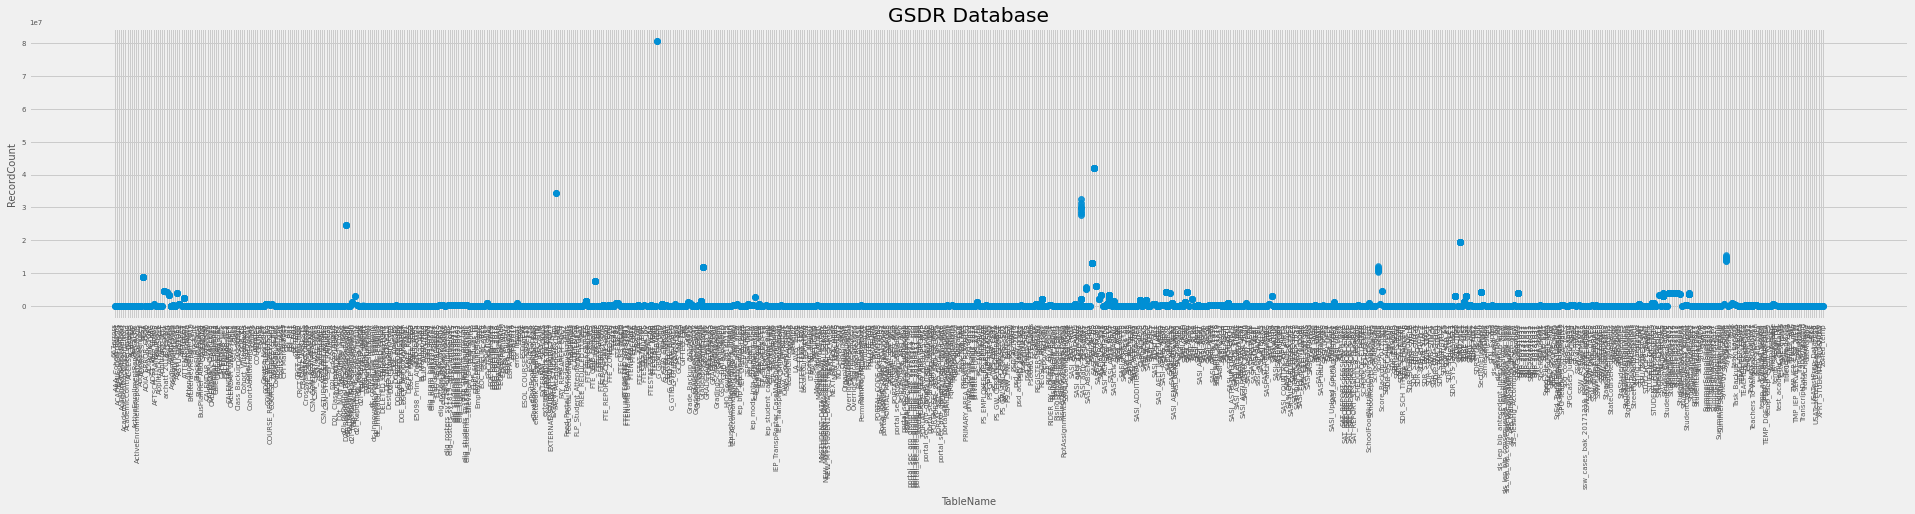

In [70]:
#dfGSDR
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('GSDR Database')
y = dfGSDR['RecordCount']
x = dfGSDR['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

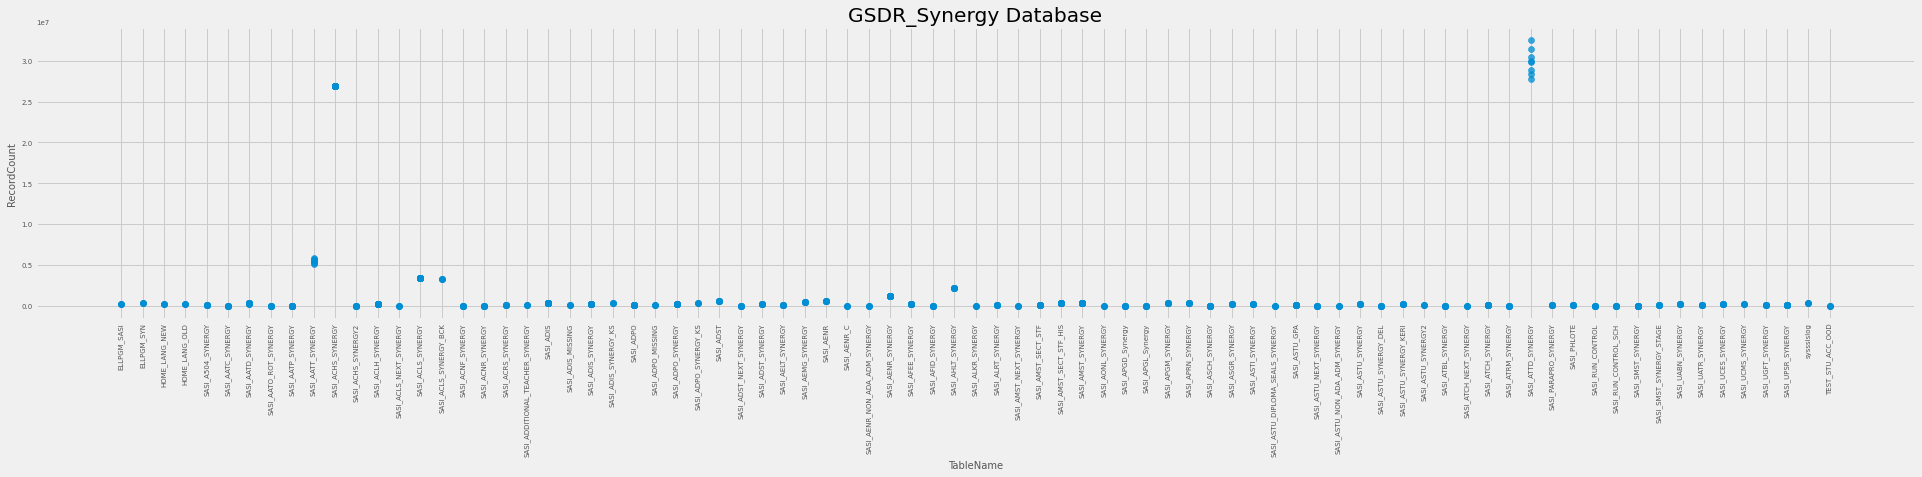

In [69]:
#dfGSDR_Synergy
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('GSDR_Synergy Database')
y = dfGSDR_Synergy['RecordCount']
x = dfGSDR_Synergy['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

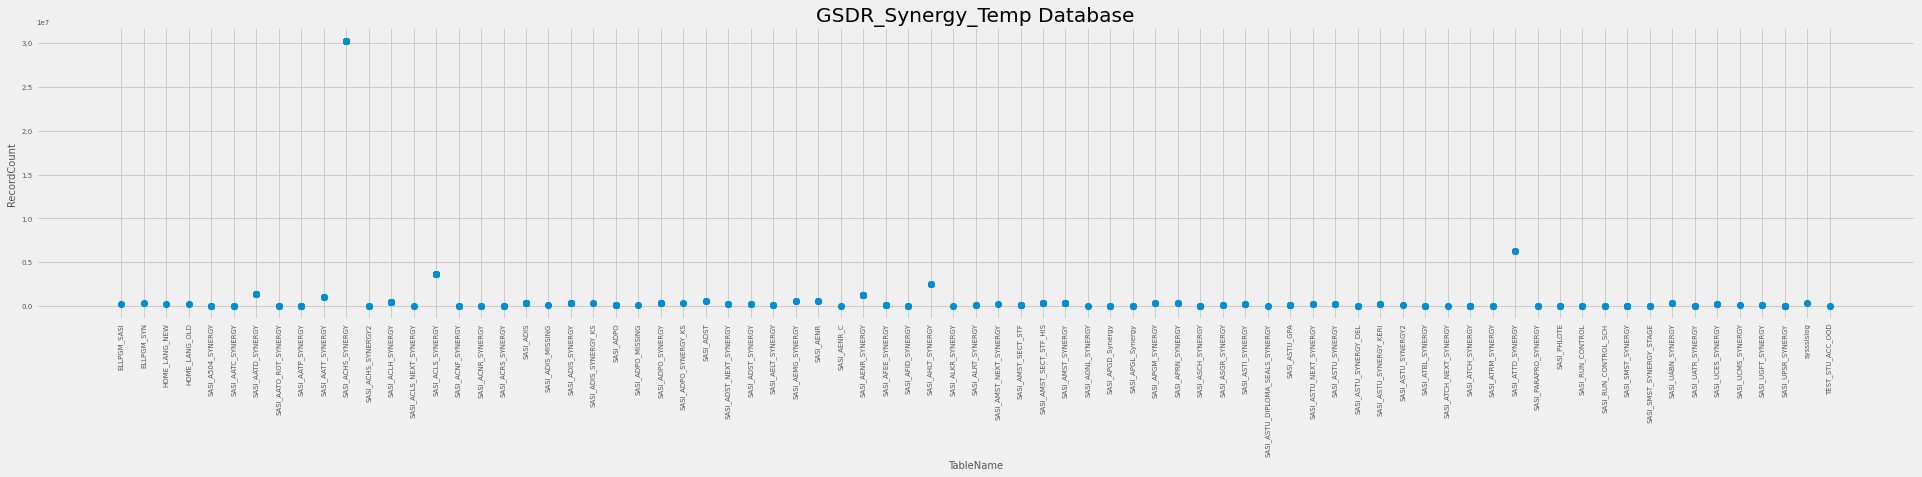

In [68]:
#dfGSDR_Synergy_Temp
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('GSDR_Synergy_Temp Database')
y = dfGSDR_Synergy_Temp['RecordCount']
x = dfGSDR_Synergy_Temp['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

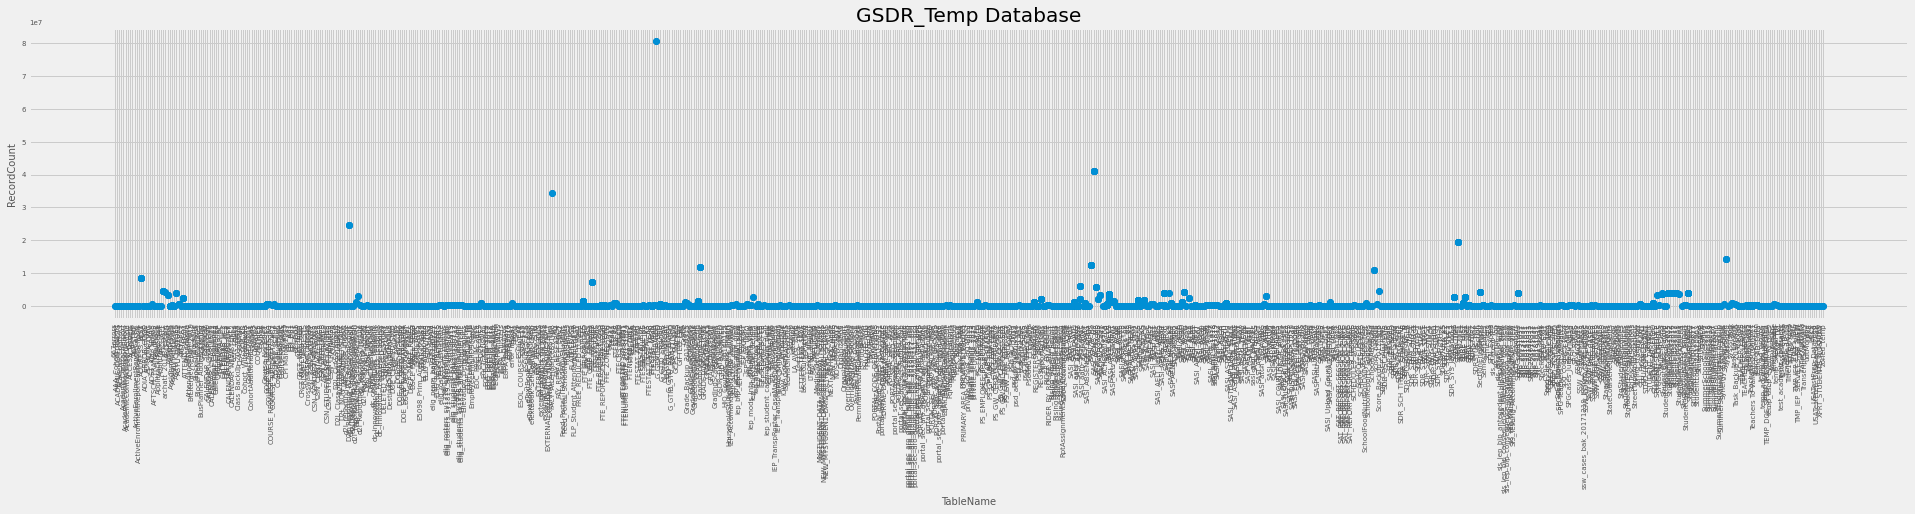

In [67]:
#dfGSDR_Temp
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('GSDR_Temp Database')
y = dfGSDR_Temp['RecordCount']
x = dfGSDR_Temp['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

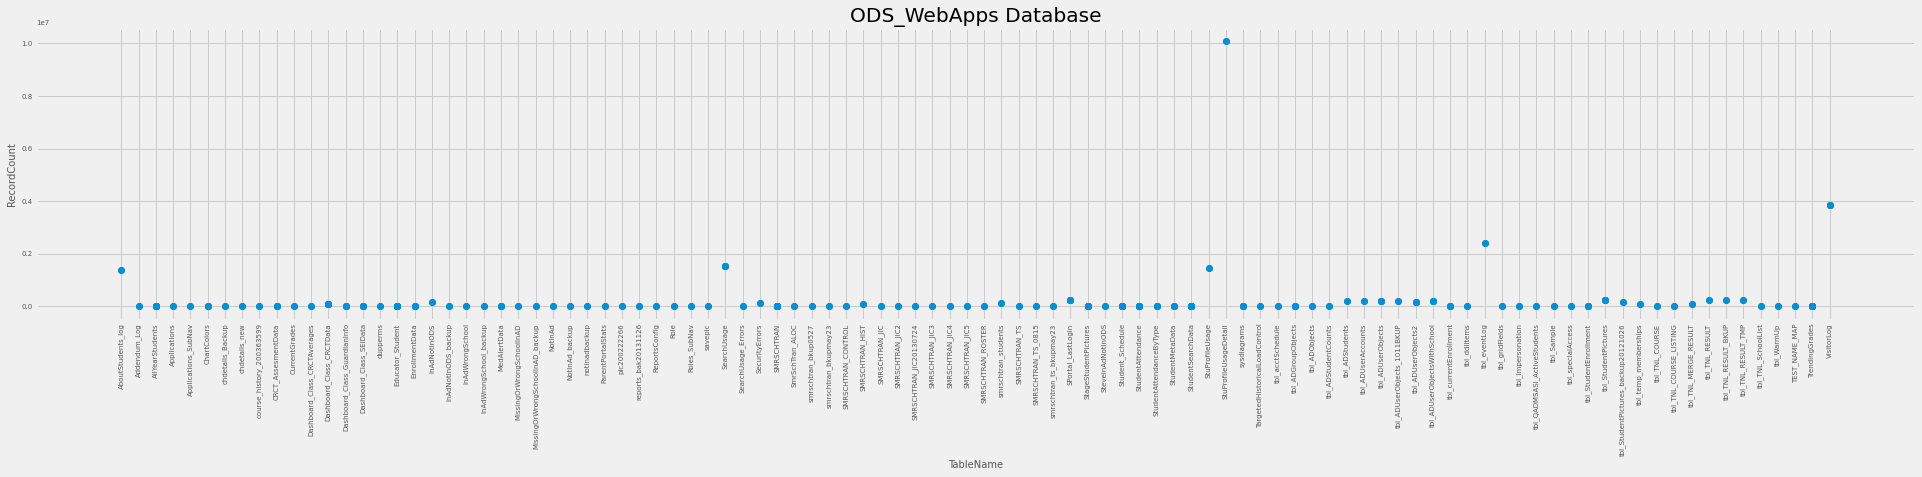

In [66]:
#dfODS_WebApps
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('ODS_WebApps Database')
y = dfODS_WebApps['RecordCount']
x = dfODS_WebApps['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

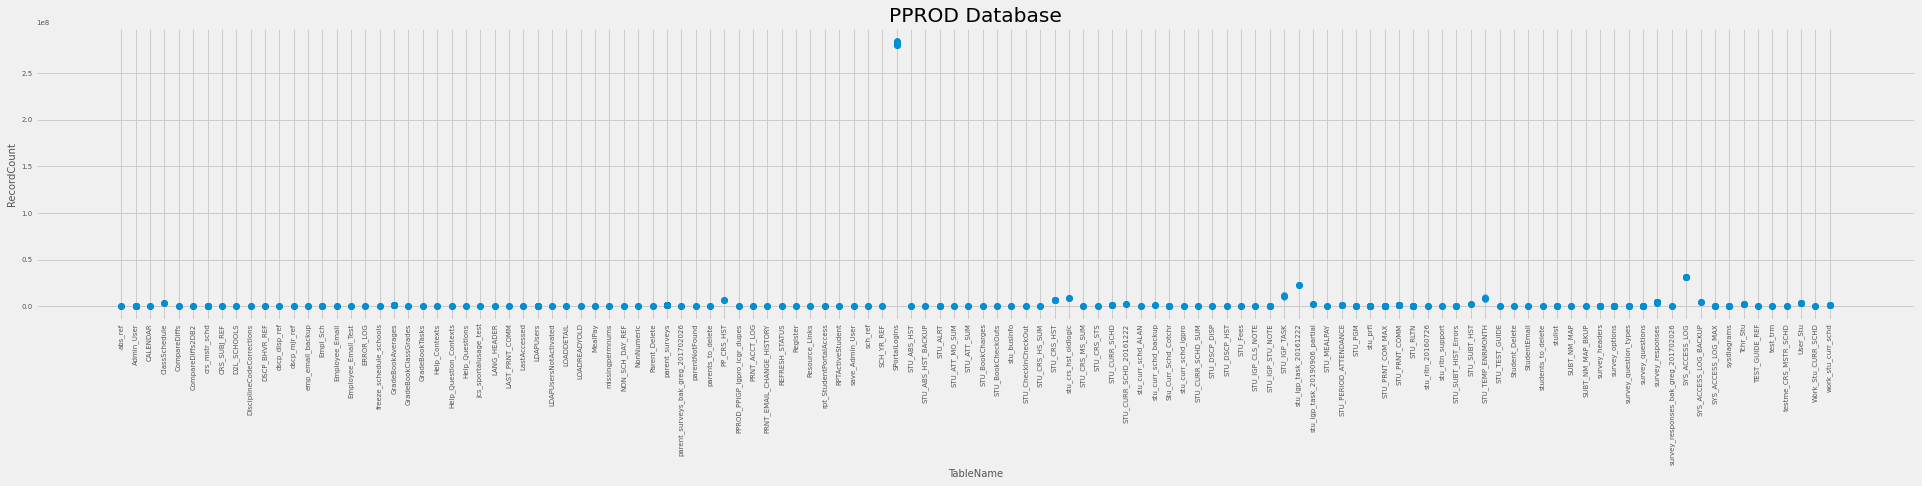

In [65]:
#dfPPROD
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('PPROD Database')
y = dfPPROD['RecordCount']
x = dfPPROD['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

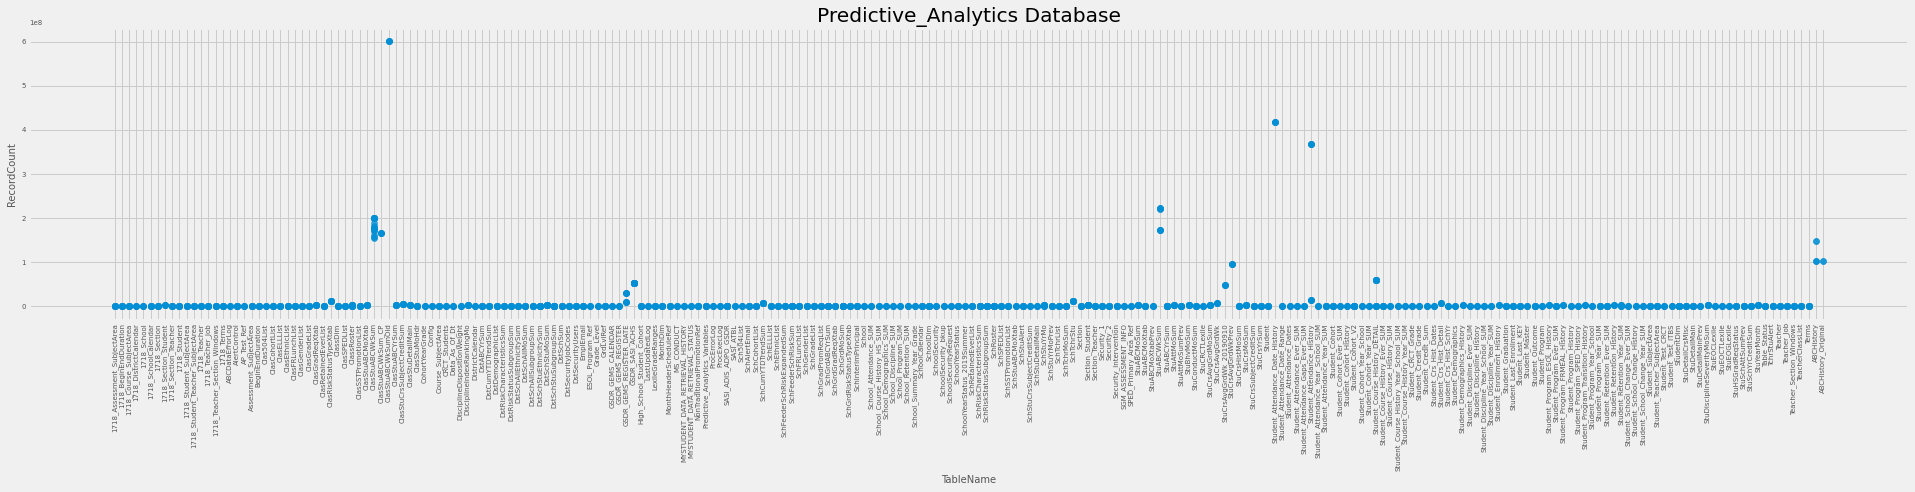

In [64]:
#dfPredictive_Analytics
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
plt.title('Predictive_Analytics Database')
y = dfPredictive_Analytics['RecordCount']
x = dfPredictive_Analytics['TableName']
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]

Alternative using GGPLOT modules for graphing data

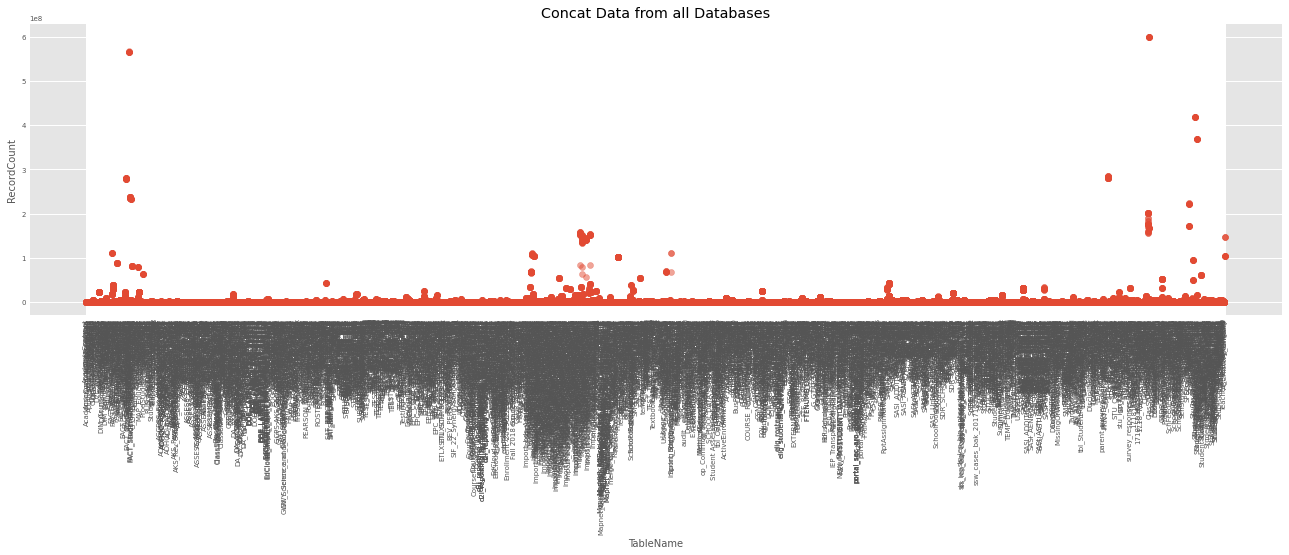

In [63]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn')
#plt.scatter(data['Lng'],data['Lat'])
plt.style.use('ggplot')
plt.xlabel('TableName', fontsize=10)
plt.ylabel('RecordCount', fontsize=10)
y = df_concat['RecordCount']
x = df_concat['TableName']
plt.title('Concat Data from all Databases')
plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7)
plt.scatter(x, y, alpha = 0.5)
plt.rcParams['figure.figsize'] = [30, 5]
